In [41]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Mapping
import random

# Функция распределения

In [42]:
def dist_gaus(x:float) -> float:
    return np.exp(-np.pi * x**2)

# Функция распределения

In [43]:
def dist_exp(x:float) -> float:
    return 0.25 * np.exp(-0.25 * x)

# Функция визуализации результатов

In [44]:
def Show(function_distribution:Mapping, function_sampling:Mapping, min_number_points:int=100, rejection:bool=True):
    x_cords = np.linspace(-4, 4, 1000)
    y_cords = function_distribution(x_cords)
    plt.plot(x_cords, y_cords)
    if rejection == True:
        sample_points_x, sample_points_y, count_iteration = function_sampling(function_distribution, min_number_points)
        plt.scatter(sample_points_x, sample_points_y, c='red')
    else:
        sample_points, count_iteration = function_sampling(function_distribution, min_number_points)
        plt.hist(sample_points, bins=10, density=True, color='red')
    plt.xlabel("X")
    plt.ylabel("Y")

# Реализация алгоритма Rejection Sampling

In [51]:
def Rejection_Sampling(function_distribution:Mapping, min_number_points:int=100):
    positive_points_x = list()
    positive_points_y = list()
    count_points = 0
    count_interations = 0
    while count_points < min_number_points:
        x = random.random() * 8 - 4
        y = random.uniform(0, 1)
        if y < function_distribution(x):
            positive_points_x.append(x)
            positive_points_y.append(y)
            count_points += 1
        count_interations += 1
    return positive_points_x, positive_points_y, count_interations

# Реализация алгоритма Метрополиса Гастингса

In [52]:
def Metropolis_Of_Hastings(function_distribution:Mapping, min_number_points:int=100):
    start_point = random.random() * 5 - 2.5
    count_points = 0
    count_iterations = 0
    positive_point = list()
    while count_points < min_number_points:
        new_point = function_distribution(start_point) + np.random.normal(size=1)        
        if random.random() < function_distribution(new_point) / function_distribution(start_point):
            positive_point.append(new_point[0])
            start_point = new_point
            count_points += 1
        count_iterations += 1
    return positive_point, count_iterations

# Результаты работы алгоритма Rejection Sampling

### Первое распределение 

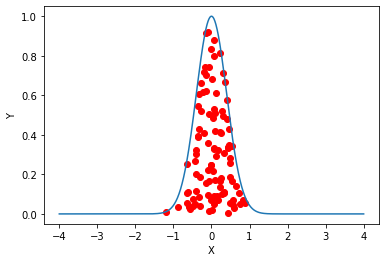

In [53]:
Show(function_distribution=dist_gaus, function_sampling=Rejection_Sampling, rejection=True)

### Второе распредение

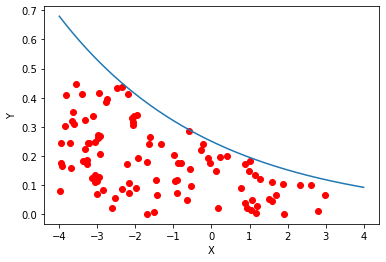

In [54]:
Show(function_distribution=dist_exp, function_sampling=Rejection_Sampling, rejection=True)

# Результаты работы алгоритма Метрополиса Гастингса

### Первое распределение 

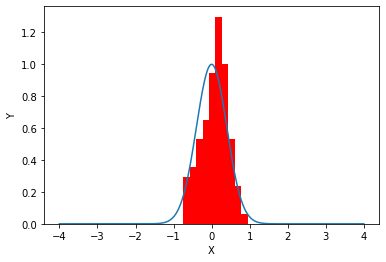

In [55]:
Show(function_distribution=dist_gaus, function_sampling=Metropolis_Of_Hastings, rejection=False)

### Второе распредение

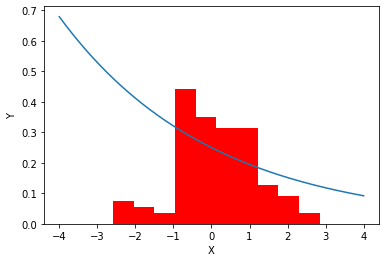

In [58]:
Show(function_distribution=dist_exp, function_sampling=Metropolis_Of_Hastings, rejection=False)